# Módulo 09 - Análise de Dados

## 0 - Imports

In [28]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from IPython.display import Image

### 0.1 - Data Collection

In [2]:
path = '/home/vvilela/repos/python_ds_dev/'
database_name = 'database_hm.sqlite'
conn = create_engine( 'sqlite:///' + path + database_name, echo=False )

In [3]:
query = """
    SELECT * FROM vitrine
"""

In [4]:
df_raw = pd.read_sql_query( query, con=conn )

## 1 - Passo 01 - Descrição dos Dados

### 1.1 - Dimensão dos Dados

In [5]:
df01 = df_raw.copy()

In [6]:
print( 'Number of rows: {}'.format(df01.shape[0]))
print( 'Number of columns: {}'.format(df01.shape[1]))

Number of rows: 282
Number of columns: 14


### 1.2 - Tipo dos Dados

In [7]:
df01.dtypes

product_id           object
style_id             object
color_id             object
product_name         object
product_color        object
fit                  object
product_price       float64
size_number          object
size_model           object
cotton              float64
polyester           float64
elastomultiester    float64
spandex             float64
scrapy_datetime      object
dtype: object

In [8]:
# conver object to datetime
df01['scrapy_datetime'] = pd.to_datetime( df01['scrapy_datetime'] )

In [9]:
df01.dtypes

product_id                  object
style_id                    object
color_id                    object
product_name                object
product_color               object
fit                         object
product_price              float64
size_number                 object
size_model                  object
cotton                     float64
polyester                  float64
elastomultiester           float64
spandex                    float64
scrapy_datetime     datetime64[ns]
dtype: object

### 1.3 - Identificação dos Dados Faltantes

In [10]:
df01.isna().sum()

product_id            0
style_id              0
color_id              0
product_name          0
product_color         0
fit                   0
product_price         0
size_number         244
size_model          244
cotton                0
polyester             0
elastomultiester      0
spandex               0
scrapy_datetime       0
dtype: int64

In [11]:
df01.isna().sum() / df01.shape[0]

product_id          0.000000
style_id            0.000000
color_id            0.000000
product_name        0.000000
product_color       0.000000
fit                 0.000000
product_price       0.000000
size_number         0.865248
size_model          0.865248
cotton              0.000000
polyester           0.000000
elastomultiester    0.000000
spandex             0.000000
scrapy_datetime     0.000000
dtype: float64

### 1.4 - Substituição dos Dados Faltantes

In [12]:
df01 = df01.drop(columns = ['size_number', 'size_model']).dropna()

### 1.5 - Descrição dos Dados

In [13]:
num_attribute = df01.select_dtypes( include=['int64', 'float64'])
cat_attribute = df01.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

#### 1.5.1 - Numerical Data

In [14]:
# tendencia central - media, mediana
t1 = pd.DataFrame( num_attribute.apply( np.mean ) ).T
t2 = pd.DataFrame( num_attribute.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attribute.apply( np.std ) ).T
d2 = pd.DataFrame( num_attribute.apply( np.min ) ).T
d3 = pd.DataFrame( num_attribute.apply( np.max ) ).T
d4 = pd.DataFrame( num_attribute.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attribute.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attribute.apply( lambda x: x.kurtosis() ) ).T

# concat
m1 = pd.concat( [d2, d3, d4, d1, t1, t2, d5, d6] ).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'media', 'mediana', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,media,mediana,std,skew,kurtosis
0,product_price,7.99,49.99,42.00,10.241720,26.809149,22.99,0.707784,-0.363797
1,cotton,0.77,1.00,0.23,0.060639,0.968723,0.99,-2.527530,4.933861
2,polyester,0.00,1.00,1.00,0.341348,0.291738,0.00,0.543038,-1.359736
3,elastomultiester,0.00,0.09,0.09,0.019333,0.004574,0.00,4.025848,14.373866
4,spandex,0.00,0.02,0.02,0.006611,0.012128,0.01,-0.263802,-0.761313


##### Mínimo

- Menor valor do conjunto de dados

##### Máximo

- Maior valor do conjunto de dados

##### Intervalo

- Estimativa de variabilidade ou dispersão
- Definição: A diferencça entre o valor máximo e o valor mínimo

##### Média

- Definição: A média é a soma de todos os valor do conjunto de dados, dividido pelo número de valores
- Exemplo: [ 3, 5, 1, 2 ]
    - Média: ( 3 + 5 + 1 + 2 ) = 11 / 4 = 2.75

In [16]:
np.mean([3,5,1,2])

2.75

##### Mediana

- Definição: A mediana é o número do meio de uma lista ordenada

- Exemplo: [ 3, 5, 1, 2 ]
- Mediana: 
    - Ordenação dos dados: [ 1, 2, 3, 5 ]
    - Posição Central: <i>Média dos Pontos Centrais</i> -> ( 2 + 3 ) / 2 = 2.5

- Exemplo: [ 1, 3, 6, 7, 10 ]
- Mediana: 
    - Ordenação dos dados: [ 1, 3, 6, 7, 10 ]
    - Posição Central: 6

##### Desvio Padrão

- Estimativa de variabilidade ou dispersão
    - Mede os valores do conjunto que estão próximos ou espalhados em torno de um ponto central
<br><br>
- Exemplo: [ 1, 5, 7, 10, 15 ] -> Média 7.6
<br><br>
- Desvio: A diferença entre os valores observados e a estimativa de localização ( média ou mediana ). Mostra quão disperso os dados estão em torno do médio.
        -> 1 - 7.6 = -6.6
        -> 5 - 7.6 = -2.6
        -> 7 - 7.6 = -0.6
        -> 10 - 7.6 = 2.4
        -> 15 - 7.6 = 7.4
        
- Variância: A soma dos desvios da média ao quadrado, dividido por n-1, onde n é o número do meu conjunto de dados ( amostra ). Resume os desvios em um único número.
        -> 1 - 7.6 = (-6.6)**2 = 43.56
        -> 5 - 7.6 = (-2.6)**2 = 6.76
        -> 7 - 7.6 = (-0.6)**2 = 0.36
        -> 10 - 7.6 = (2.4)**2 = 5.76
        -> 15 - 7.6 = (7.4)**2 = 54.76

    - Soma: ( 43.56 + 6.76 + 0.36 + 5.76 + 54.76 ) = 111.2 / (5-1) -> 27.8
<br><br>
- Desvio Padrão: A raíz quadradada da variância. O desvio padrão é muito mais fácil de interpretar do que a variância, porque essa métrica está na mesma escala dos dados originais
    - Desvio Padrão = sqrt( 27.8 ) -> 5.27

In [27]:
np.std([ 1, 5, 7, 10, 15 ], ddof=1)

5.272570530585627

##### Skewness

- É a medida do quanto uma distribuição de dados desvia de uma distribuição normal
- Sendo que a distribuição normal não possui skewness, ou seja, os dados estão distribuídos perfeitamente ao redor da média.
<br><br>
- Skewness Positiva e Negativa:
    - Mediana > Media = Deslocamento para a direita -> Skewness Negativa
    - Mediana == Media = Não tem deslocamento -> Não tenho Skewness
    - Mediana < Media = Deslocamento para a esquerda -> Skewness Positiva
    
- Como interpretar a Skewness nos dados:
    - A Skewness mostra a concentração dos dados de um lado da média.
    - Algoritmos de ML precisa treinar com dados não enviesados, ou seja, a distribuição da variável resposta ( alvo ) precisa ser o mais próximo de uma distribuição normal

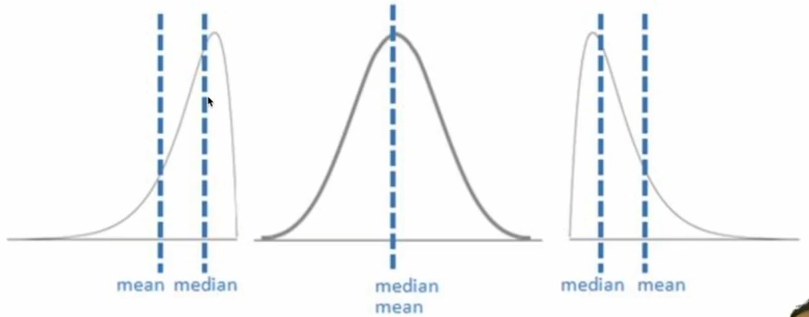

In [29]:
PATH = 'photos/skew.PNG'
Image( filename = PATH, width=900, height=900)

##### Kurtosis

In [ ]:
- Kurtosis descreve a distribuição dos dados em torno da média.
- Evidencia uma distribuição de caudas longas ( probabilidade de acontecer valores extremos )

##### Momentos da Estatística

- Momento 1: Estimativa de localização ( Média ou Mediana )
- Momento 2: Estimativa de variabilidade ( Desvios, Variância, Desvio Padrão )
- Momento 3: Skewness ( Assimetria da distribuição dos dados em relação a média )
- Momento 4: Kurtosis ( Evidência de caudas longas ( probabilidade de acontecer valores extremos ) )

#### 1.5.2 - Categorical Data

In [15]:
df01

,product_id,style_id,color_id,product_name,product_color,fit,product_price,cotton,polyester,elastomultiester,spandex,scrapy_datetime
0,0690449001,0690449,001,skinny_jeans,light_denim_blue/trashed,skinny_fit,13.99,0.99,0.00,0.0,0.01,2022-07-03 10:59:13
1,0690449002,0690449,002,skinny_jeans,denim_blue,skinny_fit,14.99,0.98,0.00,0.0,0.02,2022-07-03 10:59:13
2,0690449006,0690449,006,skinny_jeans,black/washed,skinny_fit,7.99,1.00,0.00,0.0,0.02,2022-07-03 10:59:13
3,0690449007,0690449,007,skinny_jeans,light_denim_blue,skinny_fit,14.99,1.00,0.00,0.0,0.02,2022-07-03 10:59:13
4,0690449009,0690449,009,skinny_jeans,black_washed_out,skinny_fit,17.99,0.99,0.00,0.0,0.01,2022-07-03 10:59:13
...,...,...,...,...,...,...,...,...,...,...,...,...
277,1024256005,1024256,005,slim_jeans,dark_blue,slim_fit,19.99,0.99,0.65,0.0,0.01,2022-07-03 19:22:11
278,1024256006,1024256,006,slim_jeans,dark_denim_blue,slim_fit,19.99,1.00,0.00,0.0,0.01,2022-07-03 19:22:11
279,1024256007,1024256,007,slim_jeans,dark_gray,slim_fit,19.99,0.99,0.65,0.0,0.01,2022-07-03 19:22:11
280,1024256008,1024256,008,slim_jeans,white,slim_fit,19.99,1.00,0.00,0.0,0.01,2022-07-03 19:22:11


## 2 - Passo 02 - Feature Engineering

## 3 - Passo 03 - Filtragem dos Dados

## 4 - Passo 04 - EDA (Exploratory Data Analysis)